# Deutschland Rent Project - Data Cleaning

This notebook will be used to perform a cleaning process in the pre-processed extracted data collected using ```get_offers_infos.py``` and pre-processed using ```offers_infos_preprocessor.py```. 

The goal here is to make the collected data as useble, significant and reliable as possible. I'll porform a first analysis in the formatting and characteristics of the data and remove any possible outlyers, null values, strange characters, transform possible wrong datatypes into the right ones and such.


## Where the data come from.

I got this data from a website that specializes in rental properties in Germany. The data comes in a pre-processed format 

* **offer_id** - unique id for each offer.
* **extraction_date** - extraction datetime.
* **lat** - latitude.
* **lng** - longitude.
* **city** - city.
* **area_m2** - area in squared meters.
* **furnished** - whether is furnished or unfurnished.
* **zip_code** - zip code.
* **main_category** - main category of the property.
* **rooms** - ho many rooms the property have.
* **build_year** - year of construction of the property.
* **state** - state.
* **sub_category** - sub-category of the property. 
* **balcony** - whether is has a balcony or not.
* **heat_type** - which time of head system.
* **offer_title** - the title of the property ad.
* **kitchen** - whether it has a kitchen installed or not.
* **rent_price** - rent price in Euros.
* **garden** - whether it has a garden or not.

## How the data was scraped.

The Python scraper uses the Beautiful Soup package to parsing the HTML website and extract the wanted information from there. As the craper process can be invasive for the website and the main poupose of this project is to leanr and get used to scraper tools, the script is limited to scrape only 11 German cities: Dusseldorf, Berlin, Essen, Munchen, Koln, Stuttgart, Dresden, Hannover, Dortmund, Frankfurt am Main, Hamburg.

## Imports

In [50]:
import numpy as np
import pandas as pd
import sweetviz as sv

## Load dataset

In [60]:
df = pd.read_csv('../data/all_offers_infos_pp.csv')

## First look at the data

In [61]:
df.head()

,offer_id,extraction_date,lat,lng,city,area_m2,furnished,zip_code,main_category,rooms,build_year,state,sub_category,balcony,heat_type,offer_title,kitchen,rent_price,garden
0,45678593,2021-11-17 22:34:03,50.101680,8.658270,Dusseldorf,65.00,1,60327.0,Wohnung,3.0,1903.0,Hessen,Etagenwohnung,0,Zentralheizung,* frisch renovierte 3 Zimmerwohnung * Innensta...,0,790.0,0
1,45907970,2021-11-17 22:34:03,50.929588,6.956196,Dusseldorf,40.00,1,50674.0,Wohnung,1.0,1994.0,Nordrhein-Westfalen,Apartment,1,Etagenheizung,Apartment Wohnung voll möbliert inder Zentral...,1,600.0,0
2,45809674,2021-11-17 22:34:03,51.515770,7.468510,Dusseldorf,93.92,1,44139.0,Wohnung,3.0,2021.0,Nordrhein-Westfalen,Etagenwohnung,1,Zentralheizung,Erstbezug | Parkett | Gäste-WC| AR | 2 großräu...,0,1267.0,0
3,44924940,2021-11-17 22:34:03,51.044313,13.699018,Dusseldorf,55.00,1,1159.0,Wohnung,2.0,NaN,Sachsen,Etagenwohnung,0,Zentralheizung,Frisch sanierte 2 Raum Wohnung in ruhiger Lage...,0,440.0,0
4,44630030,2021-11-17 22:34:03,50.111310,8.703920,Dusseldorf,50.00,1,60314.0,Wohnung,2.0,1955.0,Hessen,Wohnung,0,Zentralheizung,wunderschön möbilierte Wohnung gegenüber ECB,1,1299.0,0


In [62]:
num_rows_before = df.shape[0]
num_columsn_before = df.shape[1]

print('Before cleaning process.\n')
print(f'Total rows: {num_rows}.')
print(f'Total columns: {num_columsn}.')

Before cleaning process.

Total rows: 6164.
Total columns: 19.


## Check for null values

In [13]:
df.isna().sum()

offer_id              0
extraction_date       0
lat                   0
lng                   0
city                  0
area_m2             460
furnished             0
zip_code              1
main_category         0
rooms                63
build_year         1349
state                 0
sub_category          0
balcony               0
heat_type          3029
offer_title           1
kitchen               0
rent_price           15
garden                0
dtype: int64

In [20]:
# Exclude null values for rent price column - main information.
df.dropna(subset=['rent_price'], inplace=True, axis=0)

# Exclude null values for area column.
df.dropna(subset=['area_m2'], inplace=True, axis=0)

The other null values cam be managed lather.

## Check datatypes

In [6]:
# check main infos - datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6634 entries, 0 to 6633
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   offer_id         6634 non-null   int64  
 1   extraction_date  6634 non-null   object 
 2   lat              6634 non-null   float64
 3   lng              6634 non-null   float64
 4   city             6634 non-null   object 
 5   area_m2          6174 non-null   float64
 6   furnished        6634 non-null   int64  
 7   zip_code         6633 non-null   float64
 8   main_category    6634 non-null   object 
 9   rooms            6571 non-null   float64
 10  build_year       5285 non-null   float64
 11  state            6634 non-null   object 
 12  sub_category     6634 non-null   object 
 13  balcony          6634 non-null   int64  
 14  heat_type        3605 non-null   object 
 15  offer_title      6633 non-null   object 
 16  kitchen          6634 non-null   int64  
 17  rent_price    

In [7]:
# Convert extraction date to datetime.
df['extraction_date'] = pd.to_datetime(df['extraction_date'])

## Descriptive Analysis - sweetviz

                                             |          | [  0%]   00:00 -> (? left)


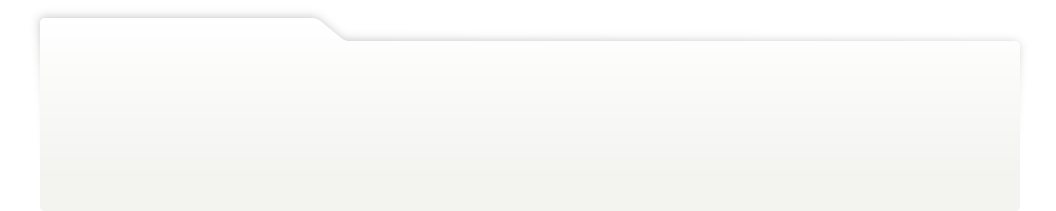
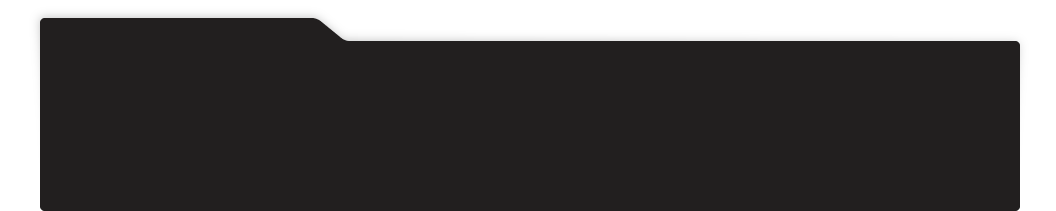
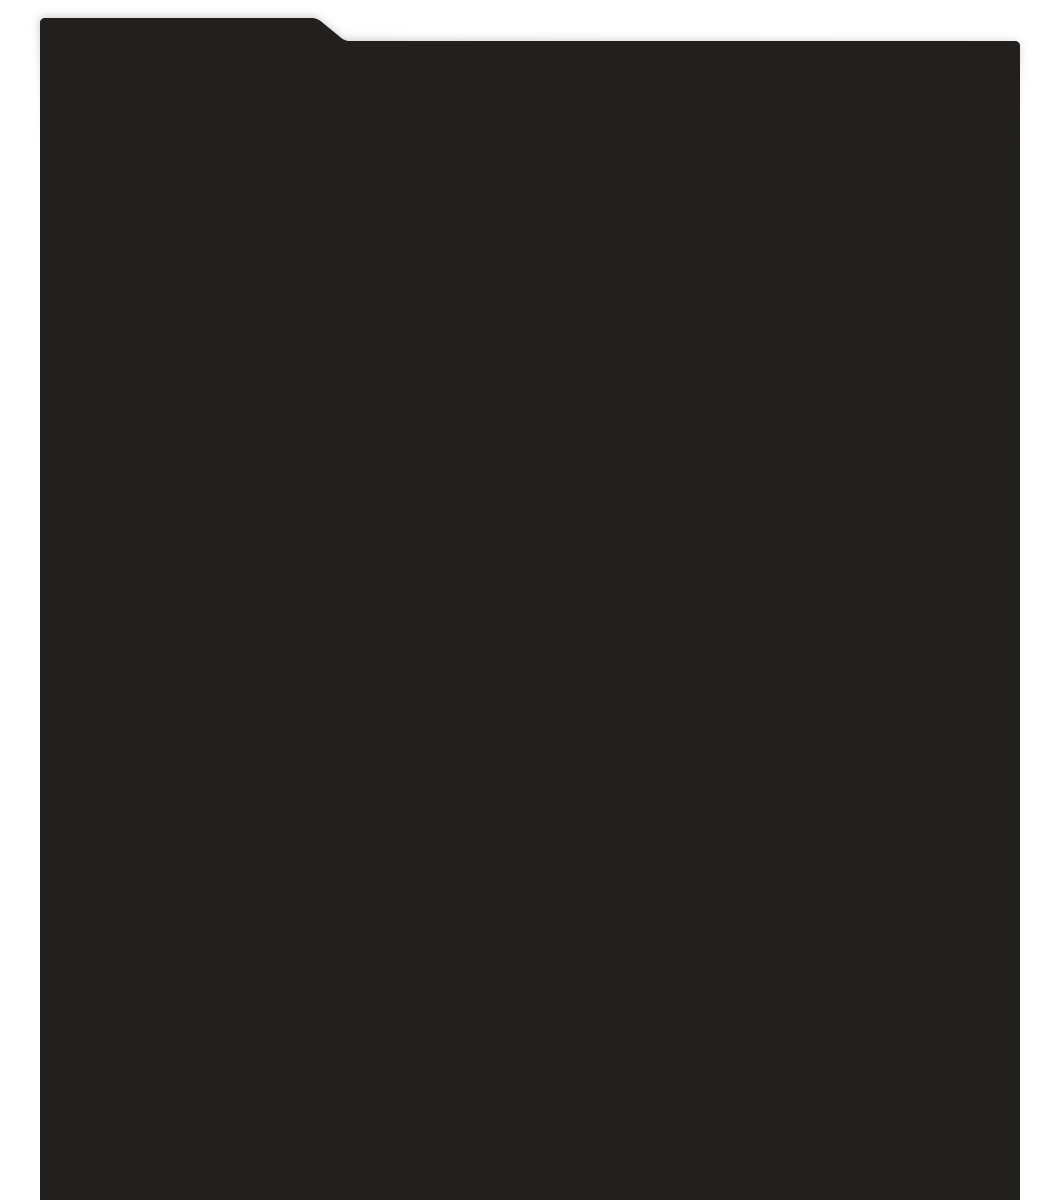
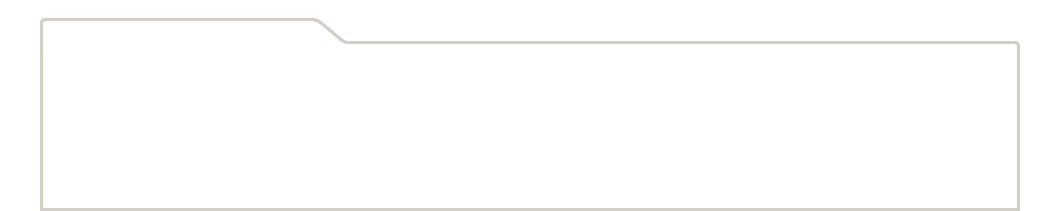
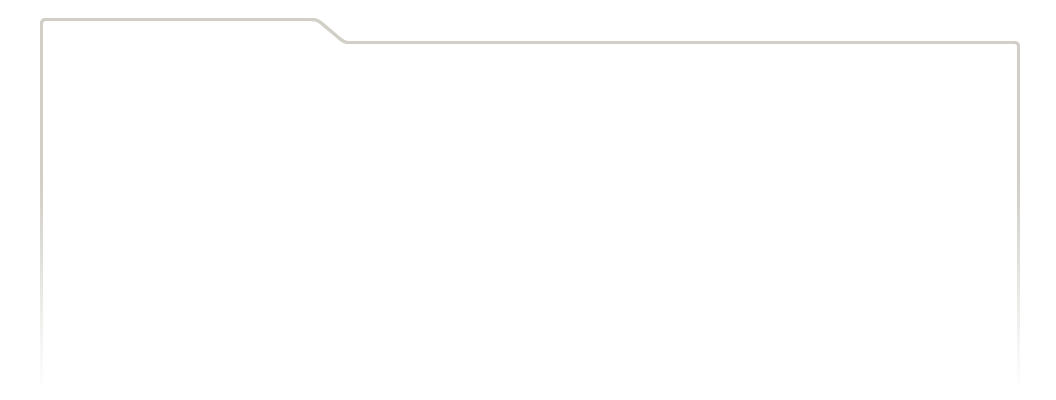
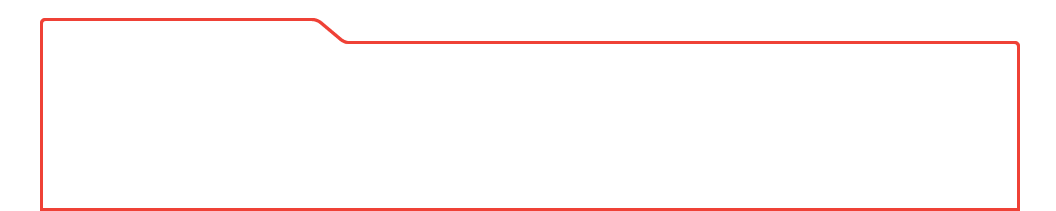
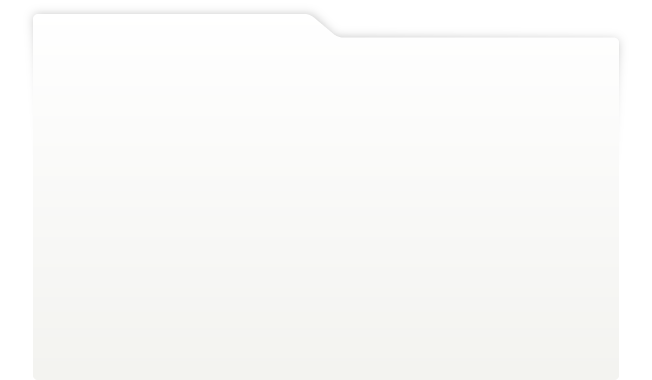
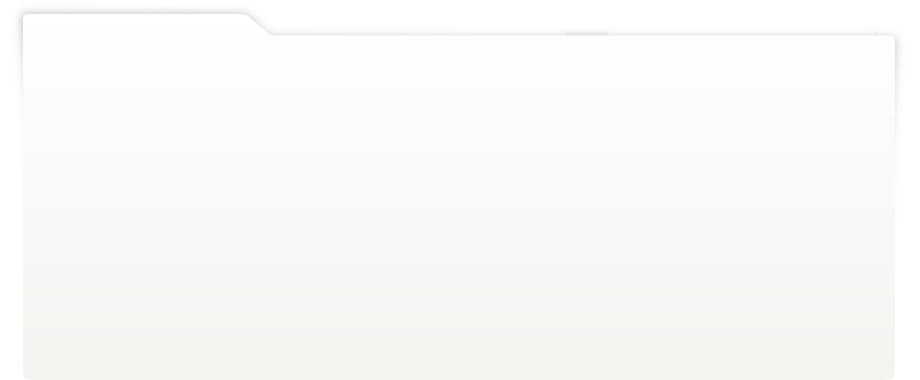
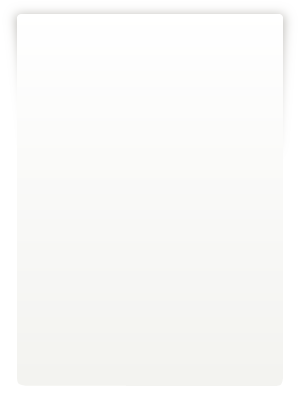
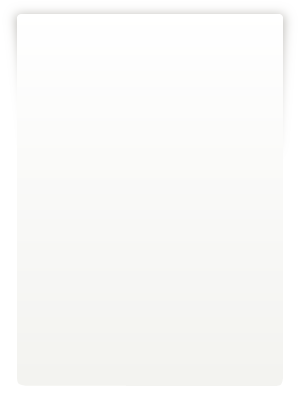
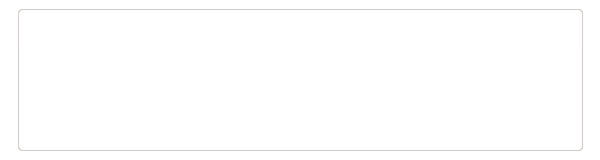
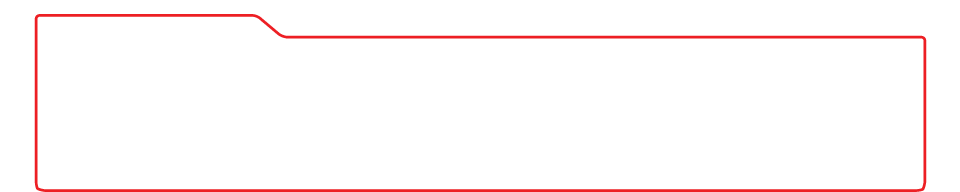
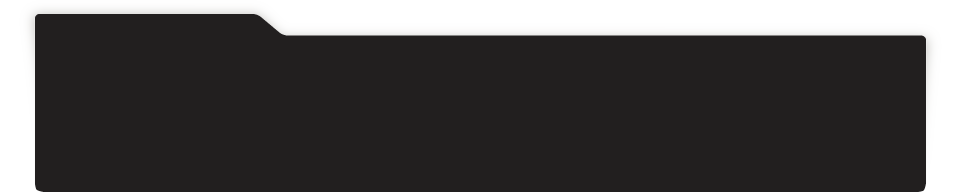
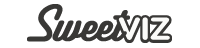
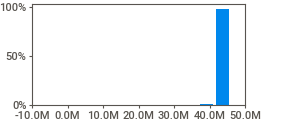
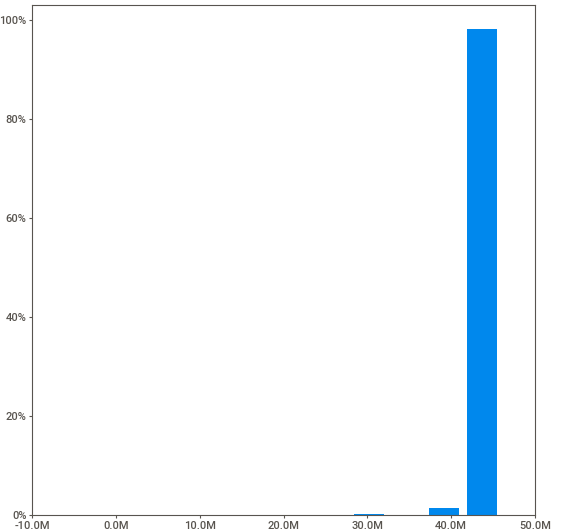
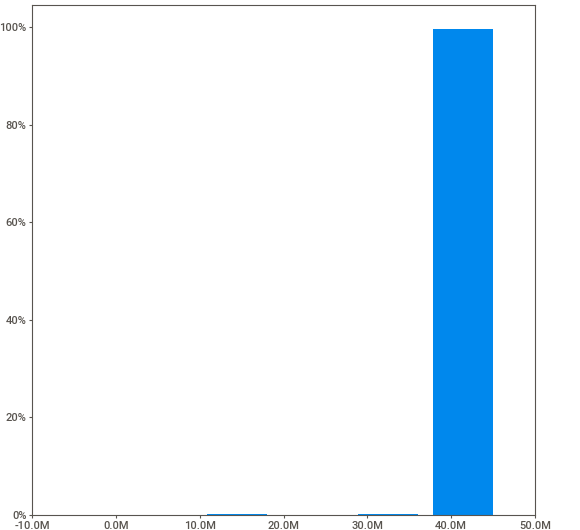
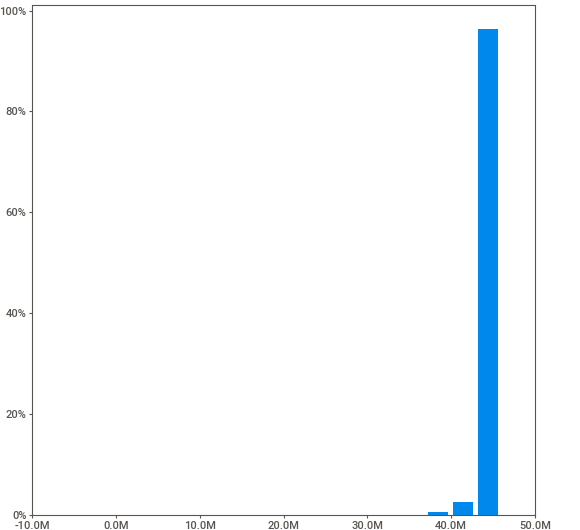
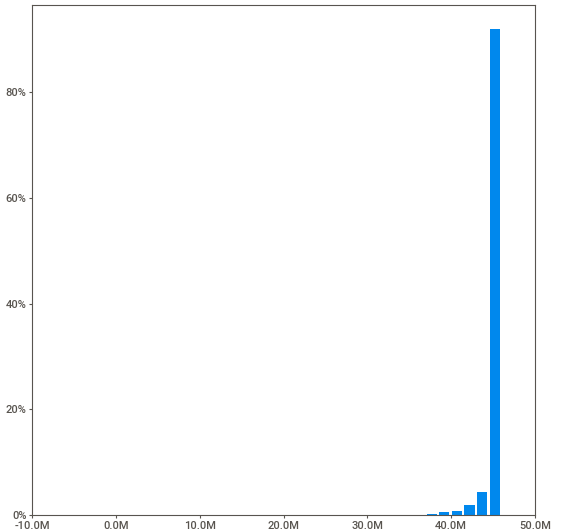
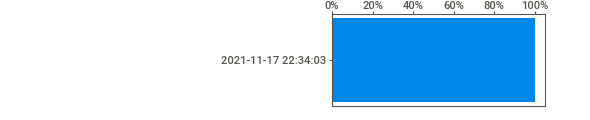
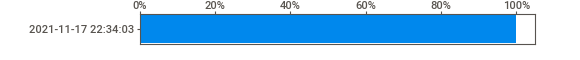
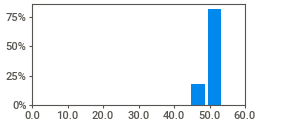
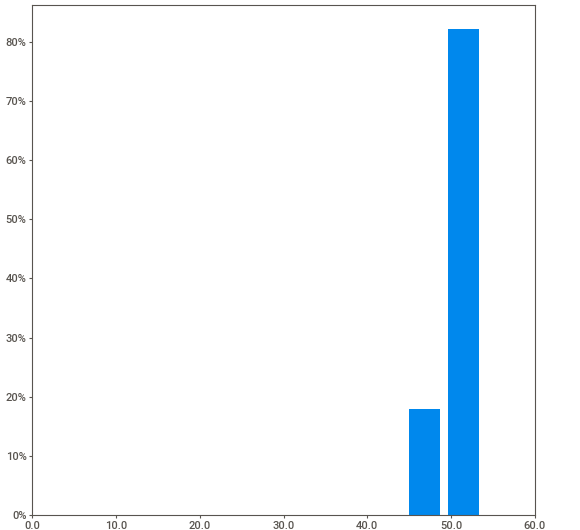
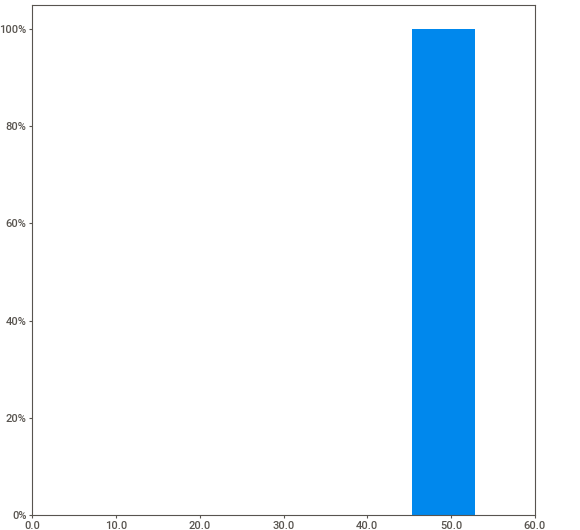
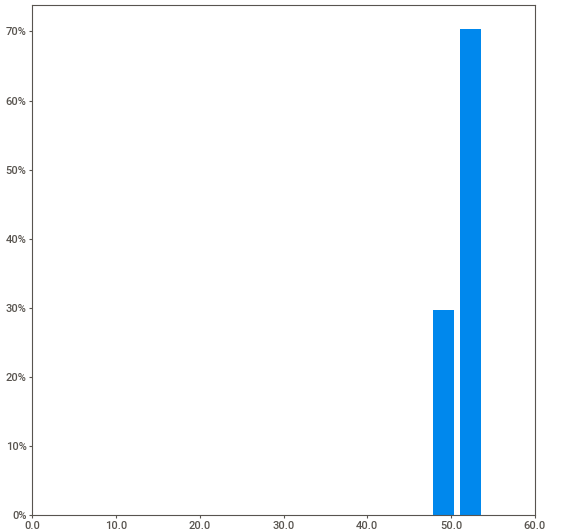
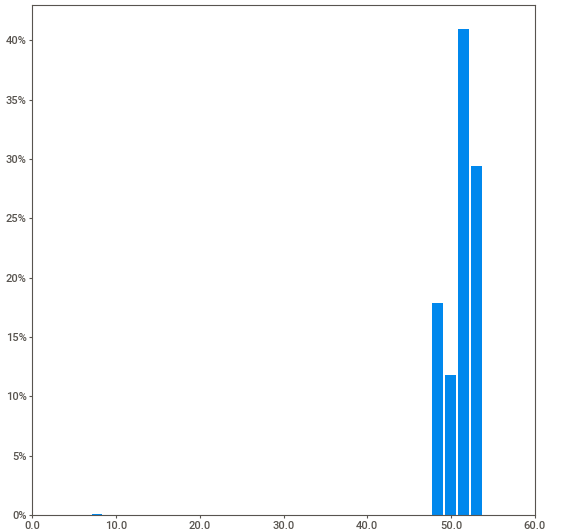
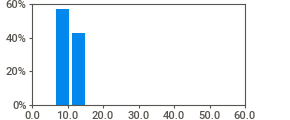
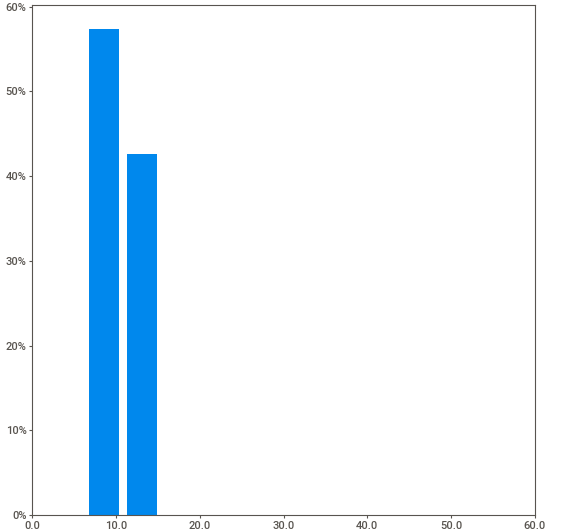
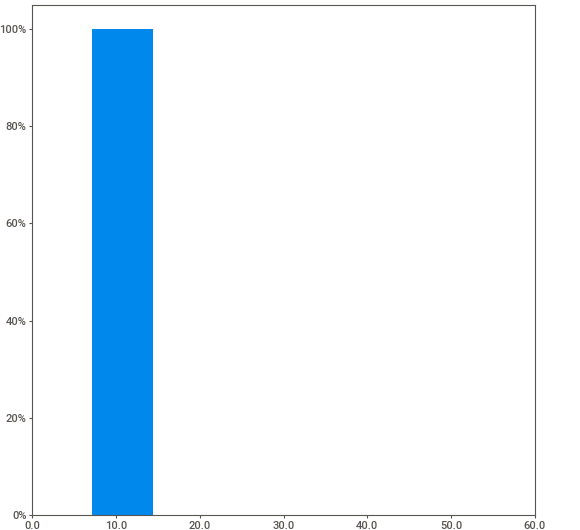
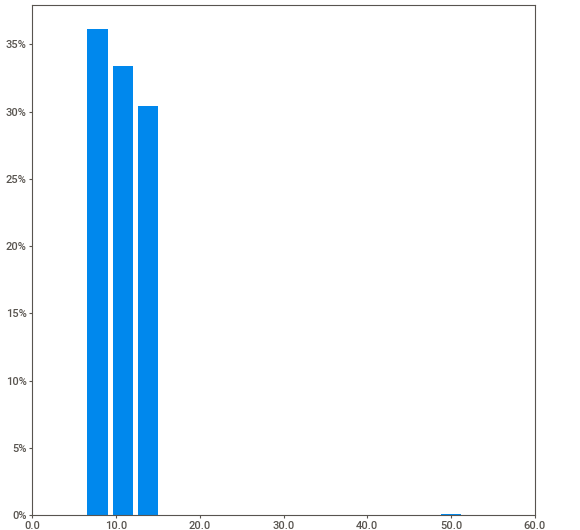
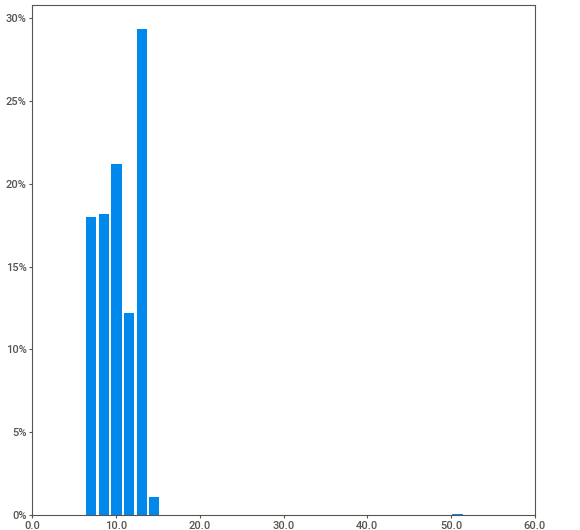
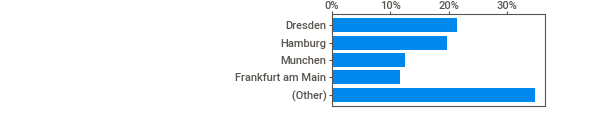
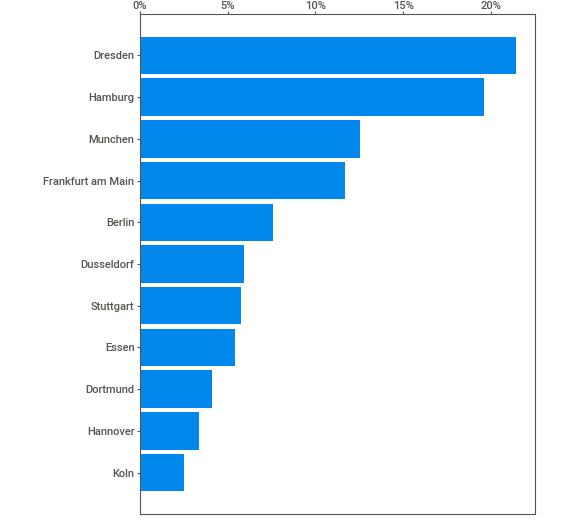
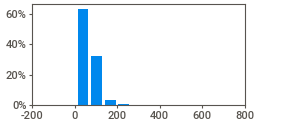
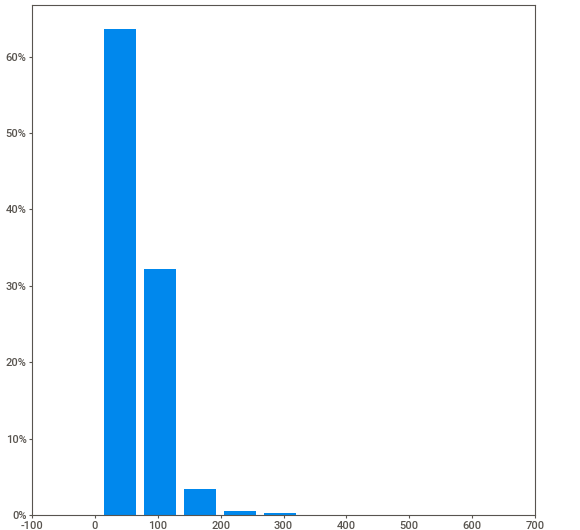
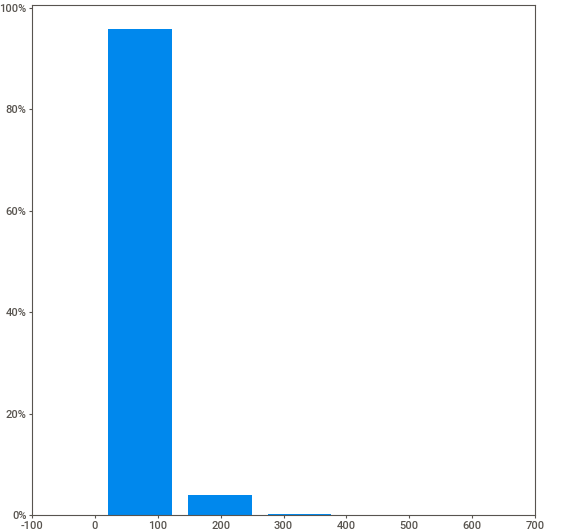
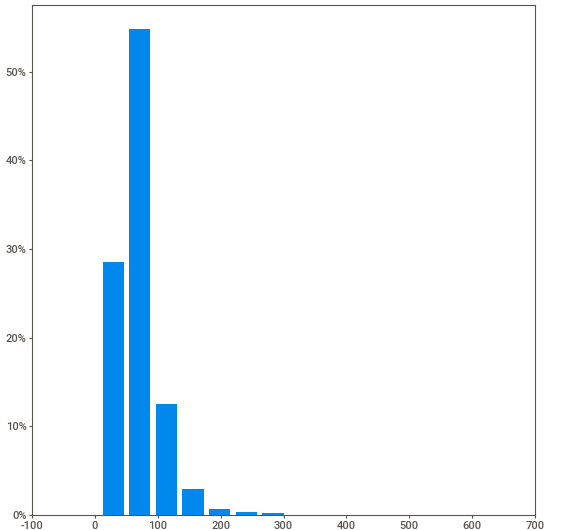
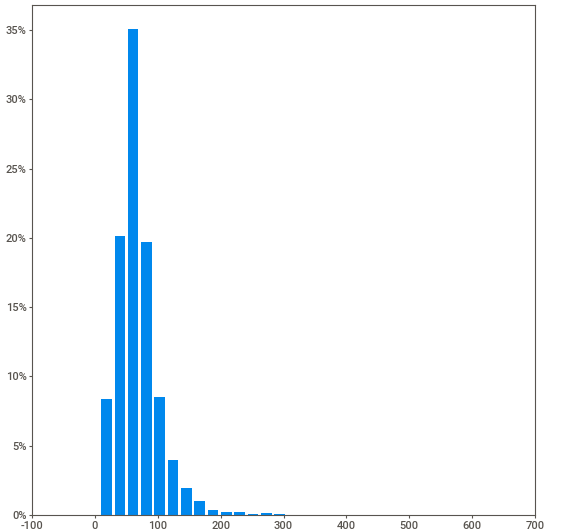
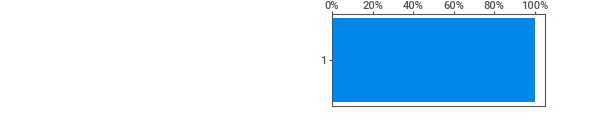
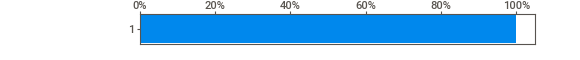
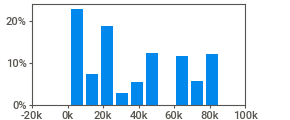
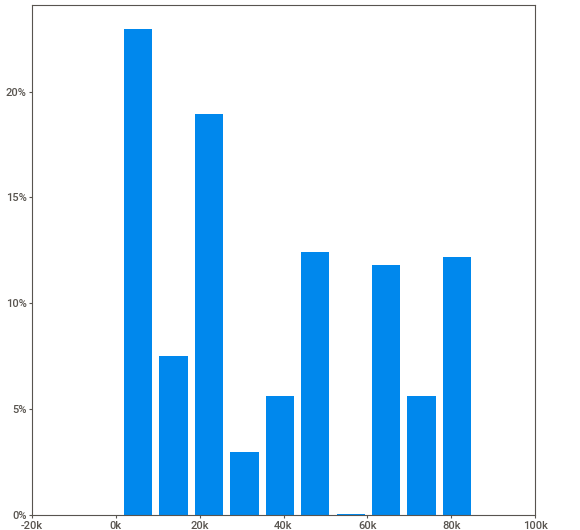
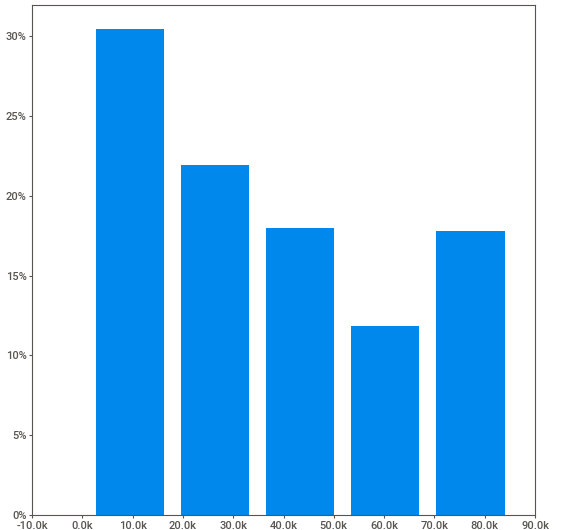
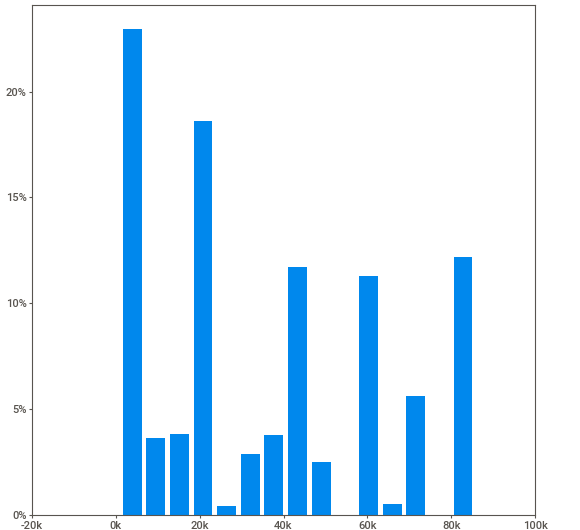
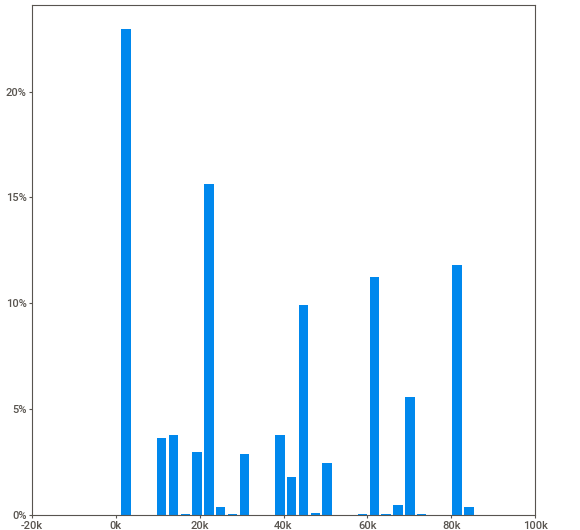
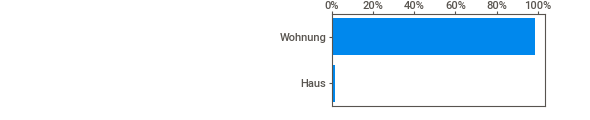
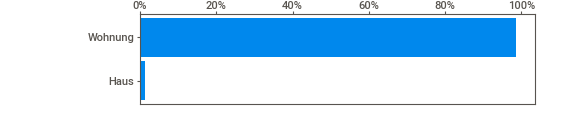
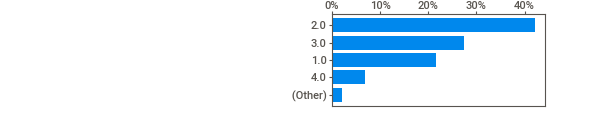
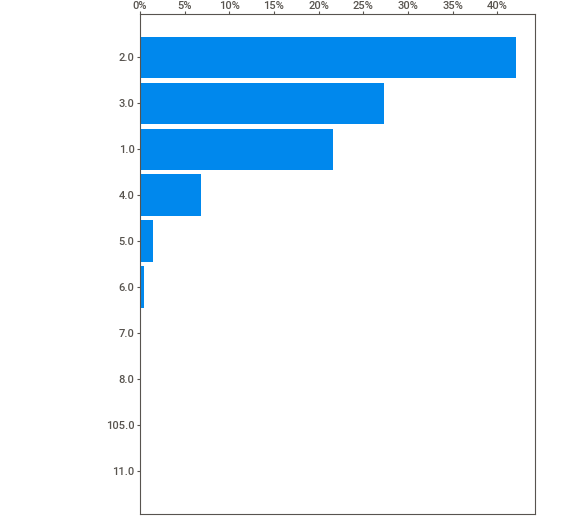
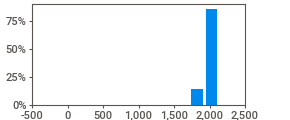
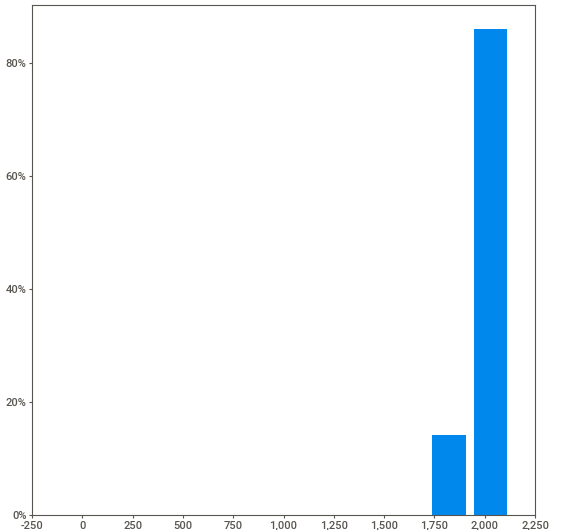
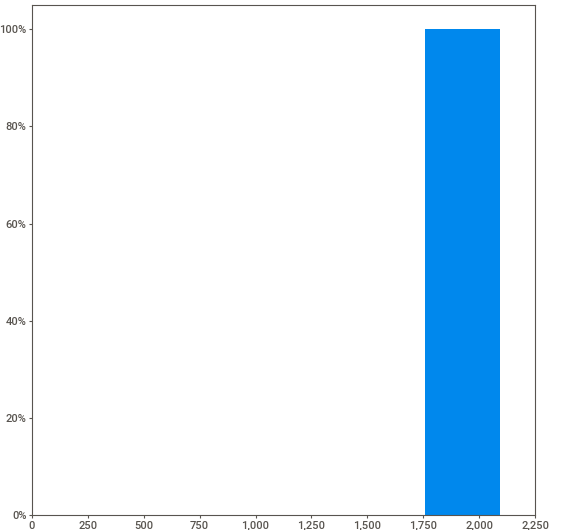
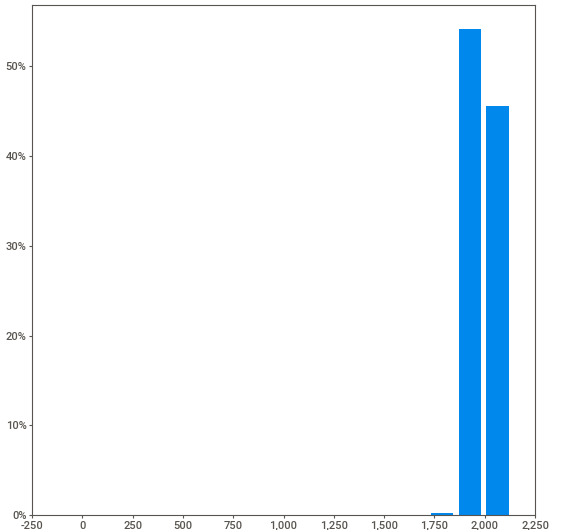
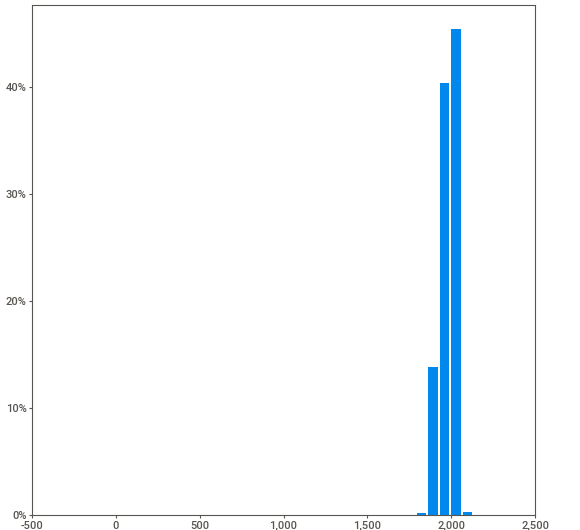
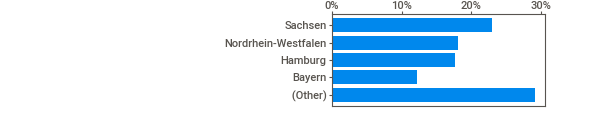
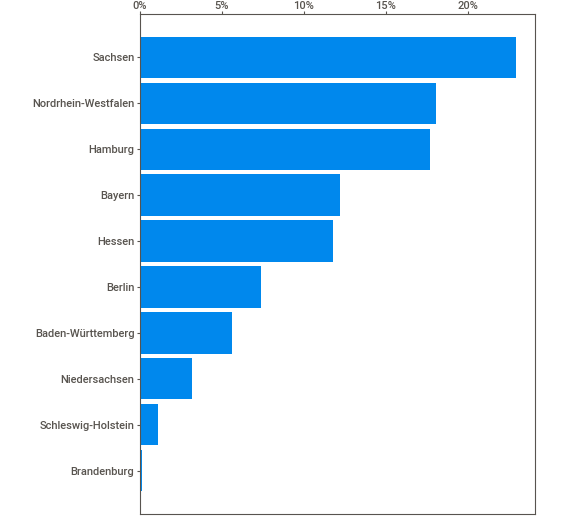
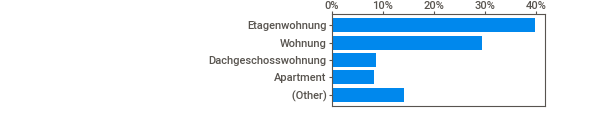
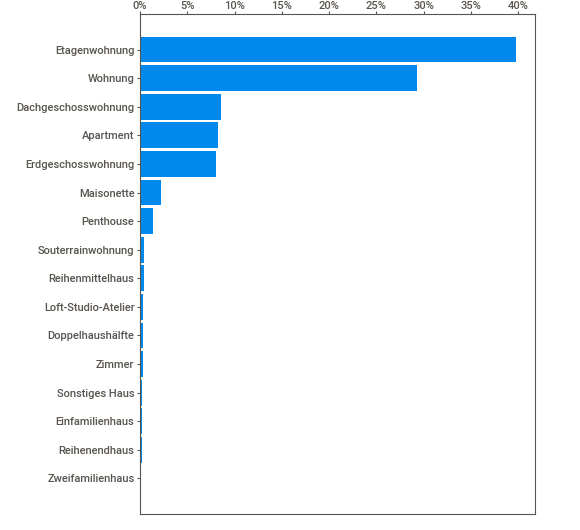
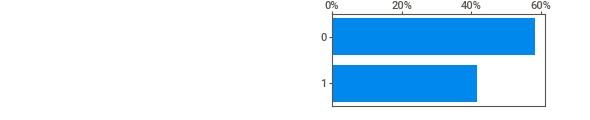
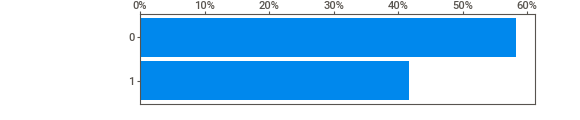
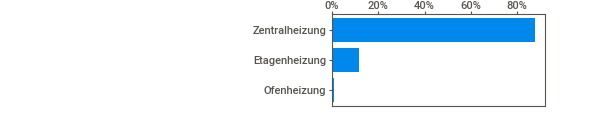
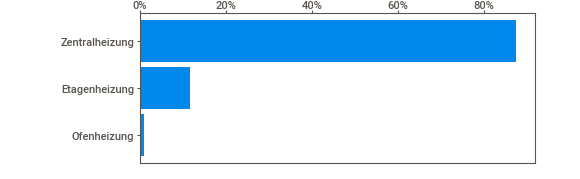
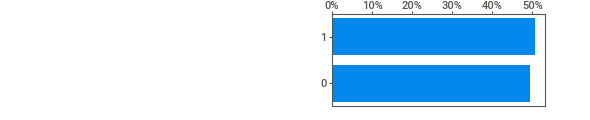
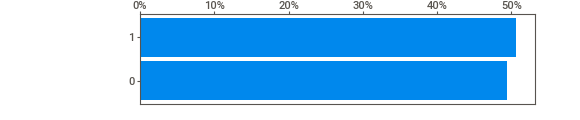
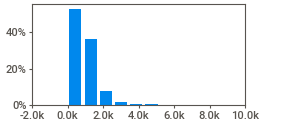
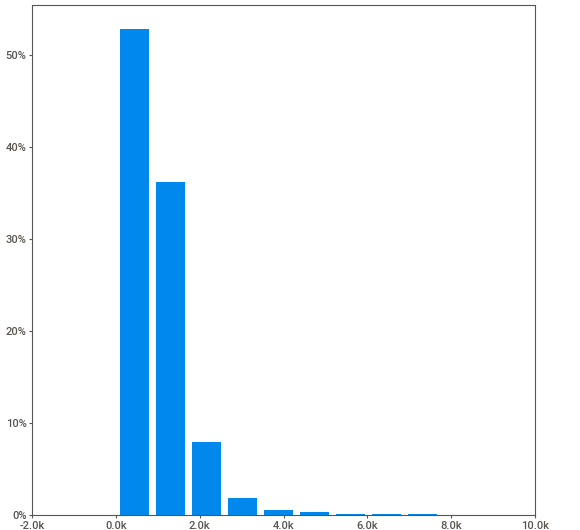
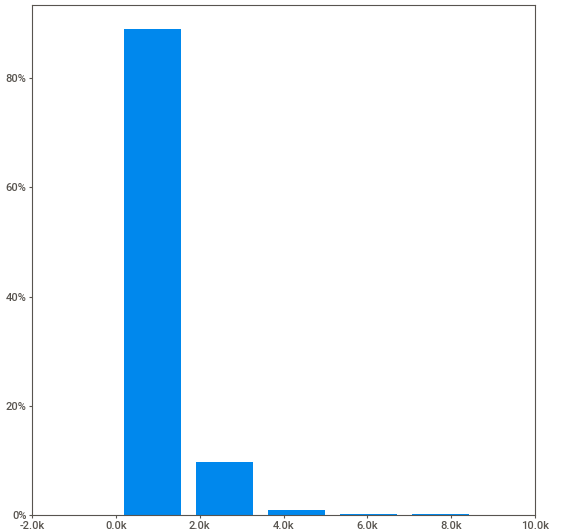
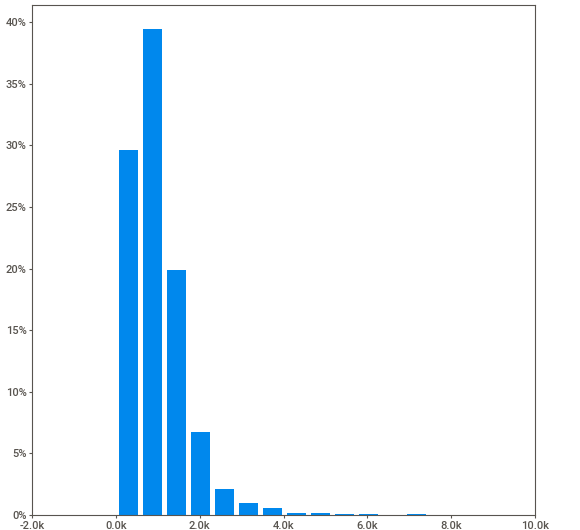
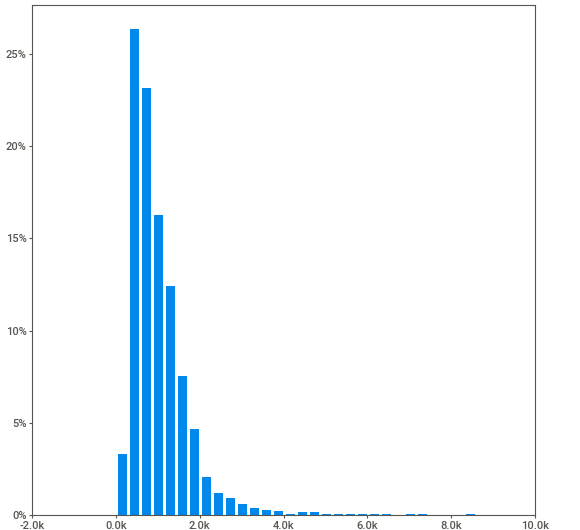
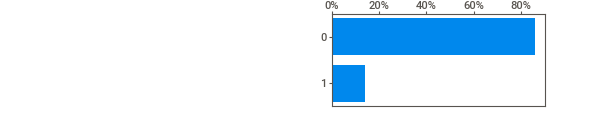
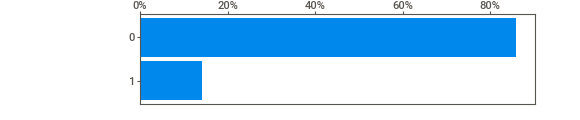
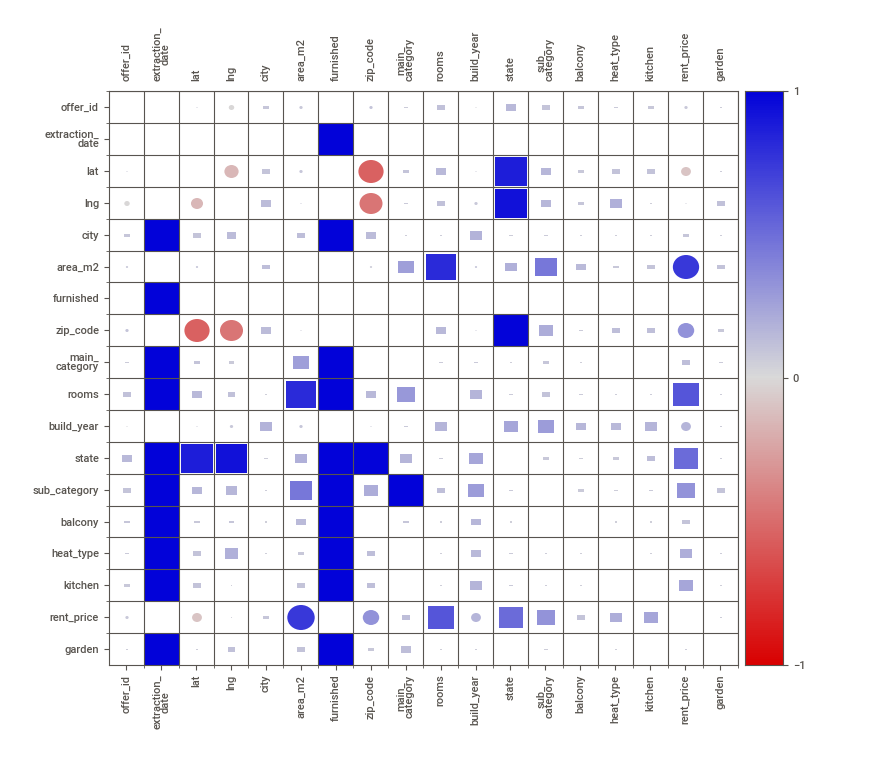
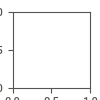

In [36]:
analysis = sv.analyze(df)
analysis.show_notebook()

In [38]:
# Area.
## the minimum area is 8m2 and the maximum 643m2.
## Is very hard to determinate a maximum area for a place so it will remain as it comes.
## The minimum value as 8m2 is too small. Our goal here is to analyse places to live in and we will assume that place under 15m2 are not a plece to live.
## Removing places with area under 15m2.
before = len(df)
df = df[df['area_m2'] >= 15]
after = len(df)
print(f'Were removed {before - after} places with area under 15m2.')

Were removed 0 places with area under 15m2.


In [42]:
# Furnished
## There are only furnished properties, what is very strange, maybe some error, the column will be removed from the dataset.

df.drop(columns=['furnished'], inplace=True)

In [47]:
# Rooms - there is a place with 105 rooms - maybe too much.
df['rooms'].value_counts()
## There is one place with 105 room and the lowest number after is 11. 
## More than 20 rooms will be excluded

2.0      2577
3.0      1671
1.0      1289
4.0       421
5.0        90
6.0        25
7.0        10
8.0         3
105.0       1
11.0        1
Name: rooms, dtype: int64

In [49]:
## There is one place with 105 room and the lowest number after is 11. 
## More than 20 rooms will be excluded.
df = df[df['rooms'] < 20]

In [52]:
# build year
## the minimum value is 61 - 1st century? and the maximum is 2133 - from the future?
## The houses lower than 1000 (we are in Germany) and grater than 2021 will be null values.
df['build_year'] = df['build_year'].apply(lambda x: np.nan if (x < 1000 or x > 2021) else x)

<ipython-input-52-b94651f38a41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['build_year'] = df['build_year'].apply(lambda x: np.nan if (x < 1000 or x > 2021) else x)


In [55]:
# Rent price
# We have properties from 15€ to 8600€.
# We will remove properties with rent price under 200€.

df = df[df['rent_price'] >= 200]

## Save the cleaned dataset

In [56]:
df.to_csv('../data/offers_infos_cleaned.csv')

## Check how many rows were excluded

In [63]:
num_rows_after = df.shape[0]
num_columsn_after = df.shape[1]

print('After cleaning process.\n')
print(f'Total rows: {num_rows_after}.')
print(f'Total columns: {num_rows_after}.')
print(f'\nWere excluded a total of {num_rows_before - num_rows_after} rows and {num_columsn_before - num_columsn_after}')


After cleaning process.

Total rows: 6634.
Total columns: 6634.

Were excluded a total of 0 rows and 0


In [77]:
df['extraction_date'].dtype

dtype('O')

In [79]:
if df['extraction_date'].dtype != 'O':
    print(True)

In [81]:
len(df['furnished'].unique())

1

## Create a script

In [85]:
%%writefile "../utils/all_offers_cleaner.py"

import os
import argparse
import numpy as np
import pandas as pd
import sweetviz as sv


def de_rent_cleaner(path, sumary):
    '''Simple Cleaner for all_offers_infos_pp.csv
    
    Removes null values, possible outliers and convert types.
    '''
    
    df = pd.read_csv(path)
    rows_before = df.shape[0]
    columns_before = df.shape[1]
    # rent price
    if 'rent_price' in df.columns:
        # Exclude null values for rent price column - main information.
        df.dropna(subset=['rent_price'], inplace=True, axis=0)
        # Rend price under 200
        df = df[df['rent_price'] >= 200]
    else:
        pass
    # area
    if 'area_m2' in df.columns:
        # Exclude null values for area column.
        df.dropna(subset=['area_m2'], inplace=True, axis=0)
        # Remove area under 15m2
        df = df[df['area_m2'] >= 15]
    else:
        pass
    # extraction date
    if df['extraction_date'].dtype != 'O': # check if the type is already datetime
        # Convert extraction date to datetime.
        df['extraction_date'] = pd.to_datetime(df['extraction_date'])
    else:
        pass
    #rooms
    if 'rooms' in df.columns:
        # exclude offers with too many rooms
        df = df[df['rooms'] < 30]
    else:
        pass
    # build year
    if 'build_year' in df.columns:
        # build year < 1000 and > 2021
        df['build_year'] = df['build_year'].apply(lambda x: np.nan if (x < 1000 or x > 2021) else x)
    else:
        pass
    # furnished
    if 'furnished' in df.columns:
        if len(df['furnished'] != 2):
            try:
                df.drop(columns=['furnished'], inplace=True)
            except:
                pass
        else:
            pass
    else:
        pass
    
    df_cleaned = df
    
    rows_after = df.shape[0]
    columns_after = df.shape[1]
    
    if sumary:
        print(f'Cleaning summary:\n\nExcluded rows: {rows_before-rows_after}\nExcluded columns: {columns_before-columns_after}\n')
    
    return df_cleaned

def parse_args():
    
    parser = argparse.ArgumentParser(description='Simple Cleaner for all_offers_infos_pp.csv')
    
    parser.add_argument(
        "-p",
        "--filepath",
        type=str,
        default="../data/all_offers_infos_pp.csv",
        help="Add all_offers_infos_pp.csv path",
    )
    
    parser.add_argument(
        "-s",
        "--sumary",
        type=bool,
        default=False,
        help="Print a summary of the cleaning process",
        choices=[True,False]
    )
    
    args = parser.parse_args()
    return args
                
def main():
    
    args = parse_args()
    path = args.filepath
    summary_or_not = args.summary
    df_cleaned = de_rent_cleaner(path=path,
                                 summary=summary_or_not)
    
    if not os.path.exists('../data'):
        os.makedirs('../data')
   
    output_dir = '../data/'
    filename = 'all_offers_cleaned.csv'
    df_cleaned.to_csv(os.path.join(output_dir, filename), index=False)
    print(f"{filename} saved at {output_dir}.")
    
if __name__=='__main__':
    main()

Overwriting ../utils/all_offers_cleaner.py


In [87]:
a = [1, 2, 3, 4, 5, 6]

all(a)

True